# Fine Tuning BERT for Hate Speech Classifiation

## 1. Data Pre-processing & EDA

In [ ]:
import pandas as pd
import re
import string

In [ ]:
# Read the dataset
df = pd.read_csv('HateSpeechDatasetBalanced.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Shuffle the dataset
df_sampled = df.sample(n=len(df))
df_sampled = df_sampled.reset_index(drop=True)
pd.set_option('display.max_colwidth', None)
df_sampled.head()

,Content,Label
0,thanks this article on the office of pm is superb i am sure that it is correct and it is well written especially the opening summary from a historical perspective thanks to all involved suits my purpose very well indeed,0
1,but there were some shitty my ass fake chinky fireworks,1
2,it is easier to be stay in touch back then take to the beauties of the future the only issue with mine is there are many people about this world that are far from being beautiful in particular so i am targeting like local immigrants,1
3,nisu was be razor treble,1
4,decade nostalgia i believe that you deleted half the bloody article and yes i do consider that vandalism watch yourself and i do not think that there is a high chance of my being blocked what with this occurring quite a while ago anyway i am checking in on the decade nostalgia page as i am going to evaluate your latest edits i am also adding you to my watch list,0


<ipython-input-15-c7eacd10ec84>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df_sampled, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


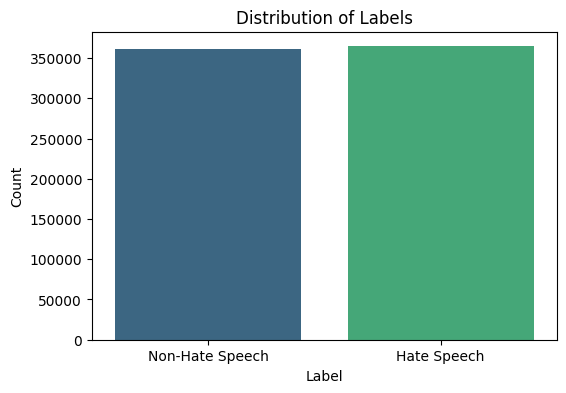

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Label', data=df_sampled, palette='viridis')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Hate Speech', 'Hate Speech'])
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


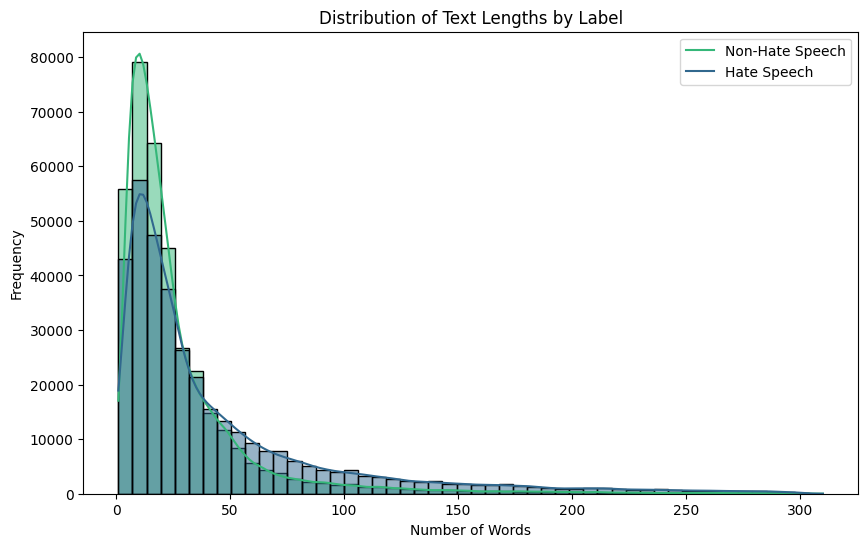

In [ ]:
# Calculate text lengths
df_sampled['Text_Length'] = df_sampled['Content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,6))
sns.histplot(data=df_sampled, x='Text_Length', hue='Label', bins=50, palette='viridis', kde=True)
plt.title('Distribution of Text Lengths by Label')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(labels=['Non-Hate Speech', 'Hate Speech'])
plt.show()

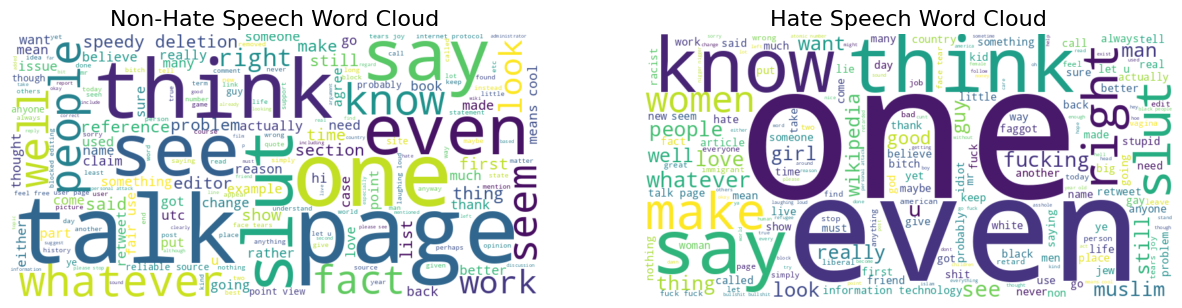

In [ ]:
# Function to preprocess text for word cloud
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Preprocess texts
df_sampled['Clean_Content'] = df_sampled['Content'].apply(preprocess_text)

# Generate word clouds
hate_speech_text = ' '.join(df_sampled[df_sampled['Label'] == 1]['Clean_Content'])
non_hate_speech_text = ' '.join(df_sampled[df_sampled['Label'] == 0]['Clean_Content'])

# Create WordCloud objects
wordcloud_hate = WordCloud(width=800, height=400, background_color='white').generate(hate_speech_text)
wordcloud_non_hate = WordCloud(width=800, height=400, background_color='white').generate(non_hate_speech_text)

# Plot Word Clouds
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_non_hate, interpolation='bilinear')
plt.title('Non-Hate Speech Word Cloud', fontsize=16)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_hate, interpolation='bilinear')
plt.title('Hate Speech Word Cloud', fontsize=16)
plt.axis('off')

plt.show()


<ipython-input-18-c6ce69bd53f4>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_common_non_hate, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grou

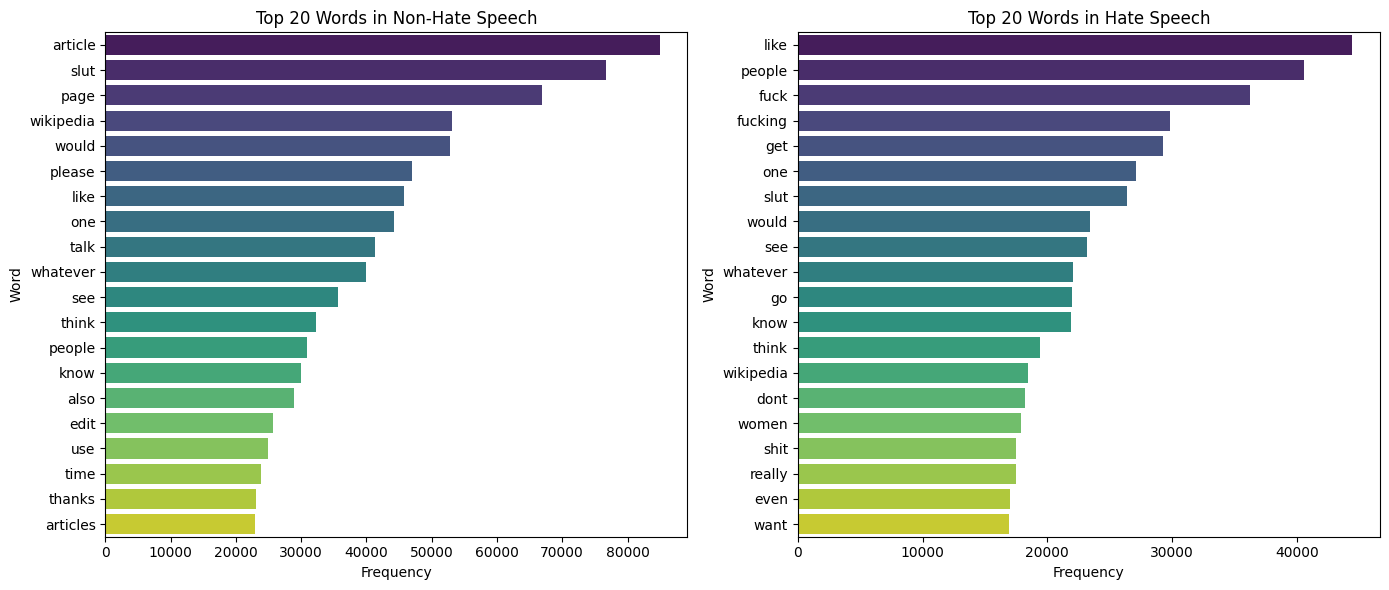

In [ ]:
from collections import Counter

# Function to get most common words
def get_most_common_words(text, n=20):
    words = text.split()
    counter = Counter(words)
    common = counter.most_common(n)
    return common

# Get most common words
common_non_hate = get_most_common_words(non_hate_speech_text)
common_hate = get_most_common_words(hate_speech_text)

# Convert to DataFrame
df_common_non_hate = pd.DataFrame(common_non_hate, columns=['Word', 'Frequency'])
df_common_hate = pd.DataFrame(common_hate, columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=df_common_non_hate, palette='viridis')
plt.title('Top 20 Words in Non-Hate Speech')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=df_common_hate, palette='viridis')
plt.title('Top 20 Words in Hate Speech')
plt.xlabel('Frequency')
plt.ylabel('Word')

plt.tight_layout()
plt.show()